<a href="https://colab.research.google.com/github/LosPowerPeralta/ADA-Informes-Matias/blob/main/Informe_BucketSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problema de ordenamiento

Los problemas de ordenamiento desde hace mucho tiempo llevan siendo un desafío para los programadores ya que siempre se intenta buscar algún algoritmo el cual pueda resolverlos de la forma más rápida posible con el menor tiempo.

Por esta misma razón se decidió inventar un nuevo método de ordenamiento conocido como BucketSort.

Entrada: una secuencia de n números $[a_1, a_2,...,a_n]$

Salida: Retorna una secuencia de n números ordenada de menor a mayor donde $a'_1 \leq a'_2 \leq ... \leq a'_n$.

#2. BucketSort

##2.1. Descripción del algoritmo

El algoritmo BucketSort consiste en generar una matriz de largo $n$ $x$ $m$, donde $n$ viene siendo el largo del arreglo de entrada y $m$ corresponde a la cantidad de datos que irán guardados en cada sub-array, los cuales tendrán un rango en especifico para que a través de una operación matemática los datos se posicionen en cada sub-arreglo sin realizar comparaciones, el proposito de esto es diminuir el tamaño de entrada de nuestros arreglos para que la función de ordenamiento auxiliar (en nuestro caso el InsertionSort) no realice tantos procesos a la hora de ordenar la lista de entrada.

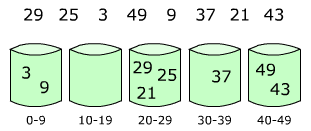

##2.2. Código

In [ ]:
#Librerias a utilizar
import random as rd
import matplotlib.pyplot as plt
import datetime
import math as mt
from timeit import repeat
from termcolor import colored

In [ ]:
def mostrarBuckets(buckets):
    print("Buckets resultantes:")
    for i in range(0, len(buckets)):
        print(colored(f"{buckets[i]}", "red"))

In [ ]:
def InsertionSort(bucket, verbose):
    if verbose:
        print("Función", colored(f"InsertionSort", "yellow"))
        print("Entrada:", colored(f"{str(bucket)}", "blue"))

    for i in range (1, len (bucket)):
        var = bucket[i]
        j = i - 1
        while (j >= 0 and var < bucket[j]):
            bucket[j + 1] = bucket[j]
            j = j - 1
        bucket[j + 1] = var

    if verbose:
        print("Salida:", colored(f"{str(bucket)}", "yellow"), "\n")

In [ ]:
def BucketSort(input_list, verbose= False):
    if verbose:
        print("Función", colored(f"BucketSort", "yellow"), "\n")
        print("Entrada:", colored(f"{str(input_list)}", "blue"))

    buckets_list = []
    max_value = max(input_list)
    size = max_value/len(input_list)

    if verbose:
        print("Se busca el mayor valor del arreglo...")
        print("El valor es:", colored(f"{max_value}", "blue"), "\n")
        #print("Largo de los buckets:", colored(f"{size}", "blue"), "\n")

    if verbose:
        print("Se generan los buckets necesarios...\n")
    for x in range(len(input_list)):
        buckets_list.append([]) 

    for i in range(len(input_list)):
        j = int(input_list[i] / size)
        if j != len(input_list):
            if verbose:
                print("Se ubica el dato", colored(f"{input_list[i]}", "red"), "en el bucket con posición i =", colored(f"{j}", "blue"), "y j =", colored(f"{len(buckets_list[j])}", "blue"))
            buckets_list[j].append(input_list[i])
        else:
            if verbose:
                print("Se ubica el dato", colored(f"{input_list[i]}", "red"), "en el bucket con posición i =", colored(f"{j}", "blue"), "y j =", colored(f"{len(buckets_list[len(input_list) - 1])}", "blue"))
            buckets_list[len(input_list) - 1].append(input_list[i])
            
    if verbose:
        print("")
        mostrarBuckets(buckets_list)
        print("Ordenando Buckets...\n")
    for z in range(len(input_list)):
        InsertionSort(buckets_list[z], verbose)

    if verbose:
        print("Uniendo Buckets ordenados...")

    final_output = []
    for x in range(len(input_list)):
        final_output = final_output + buckets_list[x]

    if verbose:
        print("Salida:", colored(f"{final_output}", "yellow"))
        
    return final_output

##2.3. Ejemplo

Empezamos considerando el siguiente arreglo.

$A=[2,5,1,8,4]$

Lo primero que realizará el algoritmo será generar la cantidad de buckets que necesitemos las cuales tendrán la misma cantidad al largo de nuestro arreglo.

$buckets = [[],[],[],[],[]]$

Una vez que ya tenemos los buckets toca posicionar cada dato de nuestro arreglo original dentro de ellos, cada bucket contiene un $rango = \frac{maxValue}{largeArray} \cdot i$, donde $i$ viene siendo el bucket donde nos encontramos. En nuestro caso el rango de cada bucket va de $[[0,1.6],]1.6,3.2],]3.2,4.8],]4.8,6.4],]6.4,8]]$, con todo esto definido nuestro algorimo tomará cada valor de nuestro arreglo, lo dividirá por el rango y luego lo colocará en el bucket correspondiente.

$pos = \frac{A[0]}{rango}$, osea $\frac{2}{1.6} ≈ 1.25$, el valor truncado $= 1$

$buckets = [[],[2],[],[],[]]$

$pos = \frac{A[1]}{rango}$, osea $\frac{5}{1.6}≈ 3.12$, el valor truncado $= 3$

$buckets = [[],[2],[5],[],[]]$

$pos = \frac{A[2]}{rango}$, osea $\frac{1}{1.6}≈ 0.62$, el valor truncado $= 0$

$buckets = [[1],[2],[],[5],[]]$

$pos = \frac{A[3]}{rango}$, osea $\frac{8}{1.6} = 5$

$buckets = [[1],[2],[],[5],[8]]$

$pos = \frac{A[4]}{rango}$, osea $\frac{4}{1.6}≈ 2.5$, el valor truncado $= 2$

$buckets = [[1],[2],[4],[5],[8]]$

Una vez que están posicionadas todos los valores del arreglo dentro de los buckets se empiezan a ordenar cada uno de ellos con la función InsertioSort. En nuestro caso todos los arreglos son de largo 1, por lo tanto el InsertionSort asumirá que cada uno está ordenado.

Para finalizar el algoritmo BucketSort une cada uno de los buckets desde el primero hasta el último.

Array resultante $A = [1,2,5,4,8]$

##2.4. Ejecución del algoritmo paso a paso (Verbose = True)

In [ ]:
A=[2,5,1,8,4] 
A = BucketSort(A, True)
print(A)

Función BucketSort 

Entrada: [2, 5, 1, 8, 4]
Se busca el mayor valor del arreglo...
El valor es: 8 

Se generan los buckets necesarios...

Se ubica el dato 2 en el bucket con posición i = 1 y j = 0
Se ubica el dato 5 en el bucket con posición i = 3 y j = 0
Se ubica el dato 1 en el bucket con posición i = 0 y j = 0
Se ubica el dato 8 en el bucket con posición i = 5 y j = 0
Se ubica el dato 4 en el bucket con posición i = 2 y j = 0

Buckets resultantes:
[1]
[2]
[4]
[5]
[8]
Ordenando Buckets...

Función InsertionSort
Entrada: [1]
Salida: [1] 

Función InsertionSort
Entrada: [2]
Salida: [2] 

Función InsertionSort
Entrada: [4]
Salida: [4] 

Función InsertionSort
Entrada: [5]
Salida: [5] 

Función InsertionSort
Entrada: [8]
Salida: [8] 

Uniendo Buckets ordenados...
Salida: [1, 2, 4, 5, 8]
[1, 2, 4, 5, 8]


#3. Tiempo de ejecución

##Teorema (Tiempo de ejecución).

El tiempo de ejecución del BucketSort en el mejor caso tiene una complejidad de $O(n)$, en el caso promedio $O(n + k)$ donde $k$ viene siendo la complejidad del algoritmo auxiliar y en el peor caso su complejidad es de $O(k)$.

##Prueba del teorema

**Analisis del peor caso**

Observando nuestro código podemos visualizar como el peor caso de este, viene siendo cuando la gran parte de nuestros elementos queda almacenado en 1 solo bucket de todos los disponibles, para lograr esto, el mayor dato del array debe tener una gran diferencia con el segundo más grande, como por ejemplo el siguiente arreglo.

$A = [1,4,2,8,5,3,1000]$

In [ ]:
A = [1,4,2,8,5,3,1000]

A = BucketSort(A, True)

Función BucketSort 

Entrada: [1, 4, 2, 8, 5, 3, 1000]
Se busca el mayor valor del arreglo...
El valor es: 1000 

Se generan los buckets necesarios...

Se ubica el dato 1 en el bucket con posición i = 0 y j = 0
Se ubica el dato 4 en el bucket con posición i = 0 y j = 1
Se ubica el dato 2 en el bucket con posición i = 0 y j = 2
Se ubica el dato 8 en el bucket con posición i = 0 y j = 3
Se ubica el dato 5 en el bucket con posición i = 0 y j = 4
Se ubica el dato 3 en el bucket con posición i = 0 y j = 5
Se ubica el dato 1000 en el bucket con posición i = 7 y j = 0

Buckets resultantes:
[1, 4, 2, 8, 5, 3]
[]
[]
[]
[]
[]
[1000]
Ordenando Buckets...

Función InsertionSort
Entrada: [1, 4, 2, 8, 5, 3]
Salida: [1, 2, 3, 4, 5, 8] 

Función InsertionSort
Entrada: []
Salida: [] 

Función InsertionSort
Entrada: []
Salida: [] 

Función InsertionSort
Entrada: []
Salida: [] 

Función InsertionSort
Entrada: []
Salida: [] 

Función InsertionSort
Entrada: []
Salida: [] 

Función InsertionSort
Entrada: [1

Como podemos apreciar gracias al verbose, todos datos menores al mayor quedan almacenado en un solo bucket, lo que provoca que el peor caso dependa unicamente del algoritmo de ordenamiento implementado ya que la idea de dividir por buckets no está cumpliendo su función, generando un complejidad de $O(k)$, en nuestro caso es de $O(n^2)$ por tener implementado el InsertionSort.

**Analisis del mejor caso**

El mejor caso ocurre cuando cada elemento de nuestro arreglo queda almacenado en su bucket correspondiente, esto ocurre cuando tenemos un arreglo de $n$ elementos los cuales sus datos vienen siendo los siguientes: $1,2,3,...,n-2,n$.

$A = [5,4,6,2,1,3]$


In [ ]:
A = [5,4,7,2,1,3,6,8,10]

A = BucketSort(A, True)

Función BucketSort 

Entrada: [5, 4, 7, 2, 1, 3, 6, 8, 10]
Se busca el mayor valor del arreglo...
El valor es: 10 

Se generan los buckets necesarios...

Se ubica el dato 5 en el bucket con posición i = 4 y j = 0
Se ubica el dato 4 en el bucket con posición i = 3 y j = 0
Se ubica el dato 7 en el bucket con posición i = 6 y j = 0
Se ubica el dato 2 en el bucket con posición i = 1 y j = 0
Se ubica el dato 1 en el bucket con posición i = 0 y j = 0
Se ubica el dato 3 en el bucket con posición i = 2 y j = 0
Se ubica el dato 6 en el bucket con posición i = 5 y j = 0
Se ubica el dato 8 en el bucket con posición i = 7 y j = 0
Se ubica el dato 10 en el bucket con posición i = 9 y j = 0

Buckets resultantes:
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[10]
Ordenando Buckets...

Función InsertionSort
Entrada: [1]
Salida: [1] 

Función InsertionSort
Entrada: [2]
Salida: [2] 

Función InsertionSort
Entrada: [3]
Salida: [3] 

Función InsertionSort
Entrada: [4]
Salida: [4] 

Función InsertionSort
Entrada: [5]
Sa

Con la ayuda del verbose podemos verificar que el mejor caso viene siendo el dicho anteriormente, considerando que solo el BucketSort tienen una complejidad de $O(n)$ al insertar los elementos dentro de los buckets, al intentar ordenar los buckets de largo 1, el algoritmo de ordenamiento asume directamente que el array se encuentra ordenado, teniendo así una complejidad de $O(1)$, esto provoca que la complejidad temporal de la función BucketSort en su mejor caso sea de $O(n)$.

**Analisis del caso promedio**

Este último caso ocurre cuando todos los datos de nuestro arreglo se encuentran distribuidos uniformemente dentro los buckets, como por ejemplo.

$A = [1,2,3,5,6,7,10,12,15]$

In [ ]:
A = [1.5,1.6,2.1,2.3,2.4,3.4,5.1,6,3.1,1.51,1.61,1.9,1.923]

A = BucketSort(A, True)

Función BucketSort 

Entrada: [1.5, 1.6, 2.1, 2.3, 2.4, 3.4, 5.1, 6, 3.1, 1.51, 1.61, 1.9, 1.923]
Se busca el mayor valor del arreglo...
El valor es: 6 

Se generan los buckets necesarios...

Se ubica el dato 1.5 en el bucket con posición i = 3 y j = 0
Se ubica el dato 1.6 en el bucket con posición i = 3 y j = 1
Se ubica el dato 2.1 en el bucket con posición i = 4 y j = 0
Se ubica el dato 2.3 en el bucket con posición i = 4 y j = 1
Se ubica el dato 2.4 en el bucket con posición i = 5 y j = 0
Se ubica el dato 3.4 en el bucket con posición i = 7 y j = 0
Se ubica el dato 5.1 en el bucket con posición i = 11 y j = 0
Se ubica el dato 6 en el bucket con posición i = 13 y j = 0
Se ubica el dato 3.1 en el bucket con posición i = 6 y j = 0
Se ubica el dato 1.51 en el bucket con posición i = 3 y j = 2
Se ubica el dato 1.61 en el bucket con posición i = 3 y j = 3
Se ubica el dato 1.9 en el bucket con posición i = 4 y j = 2
Se ubica el dato 1.923 en el bucket con posición i = 4 y j = 3

Buckets re

Como podemos apreciar con el verbose, tenemos arreglos los cuales contienen datos y algunos no, esto provoca que al ordenar cada bucket la complejidad temporal dependa del caso promedio del método de ordenamiento auxiliar $O(n + k)$.

#4. Prueba de Correctitud

**Teorema de (Correctitud)**

El algoritmo BucketSort recibe una secuencia de $n$ números $[a_1,a_2,...,a_n]$ y retorna una la misma secuancia de números ordenados de menor a mayor: $a'_1 \leq a'_2 \leq ... \leq a'_n$.

##Prueba del teorema (Función InsertionSort)

Previamente observamos que la función del algoritmo es agregar un nuevo elemento ordenado al principio del arreglo.

Por lo que podemos probar la siguiente propiedad de bucle invariante de bucle para el `Insertion Sort`:

>Al comienzo de cada iteración del bucle, los primeros elementos del arreglo siempre estarán ordenados de menor a mayor.

**Inicialización**

Al comienzo de la primera iteración del bucle (i = 1), los primeros i elementos cumplen la propiedad ya que hasta el momento no se han revisado las siguientes posiciones del arreglo.

**Mantención**

Empezamos considerando que al principio de cada iteración i los primeros elementos del arreglo se encuetran ordenados de menor a mayor (desde $0$ hasta $i-1$). En este punto cosideraremos a $X$ como menor elemento del arreglo (como se muestra en la figura).

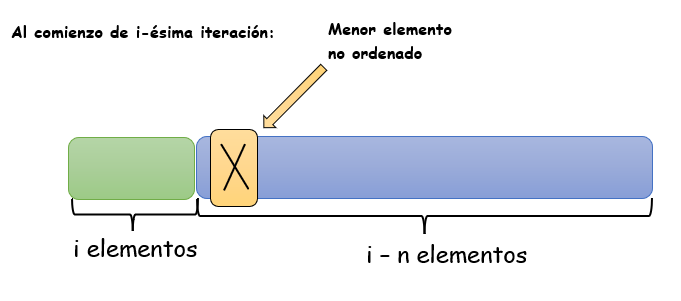

Durante el recorrido del Insertion Sort, $x$ se irá intercambiado con los elementos anteriores hasta llegar a la posición correcta ya que los datos anteriores son menores que el. 

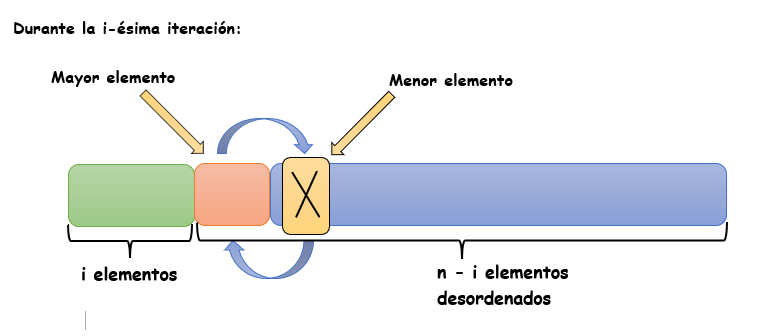

Al finalizar la iteración (y al comienzo de la siguiente), se seguirá cumpliendo la **prioridad invariante**.

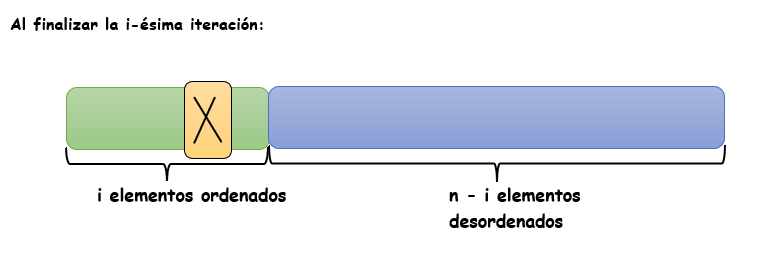

**Correctitud**

Finalmente, como la propiedad del bucle invariante es verdadera al inicio del bucle y se mantiene en cada iteración, podemos decir que al finalizar la i-ésima iteración el arreglo se encontrará ordenado de menor a mayor y con la misma cantidad de elementos, por lo tanto, cumple con su proposito.

##Prueba del teorema (Función BucketSort)

Para demostrar la correctitud de esta función haremos uso de la inducción matemática, para esto deberemos seguir los siguientes pasos.

1. Probar $P(n)$ con un caso base, como por ejemplo $P(1)$.
2. Consideramos que para caso $P(m)$ donde $m < n$ el algortimo es correcto, por lo tanto para $P(n)$ también se cumple.

Para comprobar nuestro caso base $P(1)$, nuestro algoritmo recibirá un arreglo de largo 1 el cual asumirá automaticamente que este se encuentra ordenado.

Para probar nuestro caso segundo caso, consideraremos que el arreglo recibido por nuestra función tendrá un largo de $n$ y luego cada dato ingresado en estos será colocado en sub-arreglos de largo $m < n$ el cual dependará de la cantidad de datos ingresados en cada arreglo, luego estos subarreglos serán ordenados junto a la función InsetionSort la cual ya tiene demostrada su correctitud, por lo tanto para nuestro caso está comprobado.

#5. Experimentos

##5.1. Número de comparaciones

A continuación se muestra gráficamente una comparación entre:

* Cantidad comparaciones del peor caso calculadas matemáticamente.
* Cantidad comparaciones del mejor caso calculadas matemáticamente (n-1 comparaciones si el arreglo está ordenado y el pivote se ubica en la última posición del arreglo). 
* Cantidad de comparaciones para entradas aleatorias, realizadas experimentalmente.
*   Comparación entre la cantidad de comparaciones entre BucketSort y RadixSort.

Para problemas con $n ∈ [5,100]$.

Los arreglos de entrada son:

* Casos aleatorios: La secuancia será un arreglo de números aleatorios entre 1 y 100, con $n$ cantidad de elementos.
* Peor Caso: La secuencia será un arreglo ordenado desde 0 hasta $n - 1$.